In [18]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
'''
@Env     		:   grizli
@File    		:   ~/emulator/emulator_v0.7/test_desicat.ipynb
@Time    		:   2023/07/21 11:03:59
@Author  		:   Run Wen
@Version 		:   0.7
@Contact 		:   wenrun@pmo.ac.cn
@Description	:   Test the DESI phot catalog to find out what causes errors in emulator
'''
import numpy as np
from astropy.table import Table
import re
import os
import h5py
import matplotlib
import matplotlib.pyplot as plt
import glob
from matplotlib.ticker import FuncFormatter,NullFormatter
import matplotlib.ticker as ticker
from astropy.cosmology import FlatLambdaCDM
hubble=70
cosmo = FlatLambdaCDM(H0=hubble,Om0=0.3)

import json
with open('emulator_parameters.json', 'r') as f:
    emulator_parameters = json.load(f)
arcsecperpix = emulator_parameters['arcsecperpix']# arcsec/pixel
gv_init_idx = emulator_parameters['gv_init_idx']
gv_end_idx = emulator_parameters['gv_end_idx']
gi_init_idx = emulator_parameters['gi_init_idx']
gi_end_idx = emulator_parameters['gi_end_idx']
gv_elwidth = round(emulator_parameters['gv_elwidth']/2)
gi_elwidth = round(emulator_parameters['gi_elwidth']/2)
matplotlib.rcParams['figure.figsize'] = [8, 4]

In [3]:
file = h5py.File('/Users/rain/emulator/seedcat_0702/seedcat2_0420_1046_DECaLS_0csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8_10.hdf5','r')

In [4]:
for name in file:
    print(name)
    # 如果是组，则遍历其下的所有组和数据集
    if isinstance(file[name], h5py.Group):
        for subname in file[name]:
            print(f"  {subname}")

ID
best_fit
  spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]
  wavelength_rest
  z
filters
  filter_0
  filter_1
  filter_10
  filter_11
  filter_12
  filter_13
  filter_14
  filter_2
  filter_3
  filter_4
  filter_5
  filter_6
  filter_7
  filter_8
  filter_9
parameters
parameters_name


In [6]:
file['parameters_name'][:]

array([b'z_min', b'z_max', b'd/Mpc', b'E(B-V)', b'MAG_G', b'MAG_G_ERR',
       b'MAG_R', b'MAG_R_ERR', b'MAG_Z', b'MAG_Z_ERR', b'MAG_W1',
       b'MAG_W1_ERR', b'MAG_W2', b'MAG_W2_ERR', b'RA', b'DEC', b'TYPE',
       b'SERSIC', b'SERSIC_ERR', b'SHAPE_R', b'SHAPE_R_ERR', b'SHAPE_E1',
       b'SHAPE_E1_ERR', b'SHAPE_E2', b'SHAPE_E2_ERR',
       b'vd_{eml}[km/s][0,1]', b'f[0,1]', b'sys_err0', b'sys_err1',
       b'z_{mean}', b'z_{sigma}', b'z_{MAL}', b'z_{MAP}', b'z_{median}',
       b'z_{0.16}', b'z_{0.84}', b'log(age/yr)[0,1]_{mean}',
       b'log(age/yr)[0,1]_{sigma}', b'log(age/yr)[0,1]_{MAL}',
       b'log(age/yr)[0,1]_{MAP}', b'log(age/yr)[0,1]_{median}',
       b'log(age/yr)[0,1]_{0.16}', b'log(age/yr)[0,1]_{0.84}',
       b'log(tau/yr)[0,1]_{mean}', b'log(tau/yr)[0,1]_{sigma}',
       b'log(tau/yr)[0,1]_{MAL}', b'log(tau/yr)[0,1]_{MAP}',
       b'log(tau/yr)[0,1]_{median}', b'log(tau/yr)[0,1]_{0.16}',
       b'log(tau/yr)[0,1]_{0.84}', b'log(Z/Zsun)[0,1]_{mean}',
       b'log(Z/Zs

In [7]:
print(list(file['parameters_name'][:]).index(b'log(M*)[0,1]_{MAL}'))
print(list(file['parameters_name'][:]).index(b'log(SFR_100Myr/[M_{sun}/yr])[0,1]_{MAL}'))
print(list(file['parameters_name'][:]).index(b'z_{MAL}'))

115
101
31


In [10]:
extract_param = [b'z_{mean}',b'z_{median}',b'z_{MAP}',b'z_{MAL}',
                 b'log(M*)[0,1]_{mean}', b'log(M*)[0,1]_{median}', b'log(M*)[0,1]_{MAP}', b'log(M*)[0,1]_{MAL}', 
                 b'log(SFR_100Myr/[M_{sun}/yr])[0,1]_{mean}', b'log(SFR_100Myr/[M_{sun}/yr])[0,1]_{median}', b'log(SFR_100Myr/[M_{sun}/yr])[0,1]_{MAP}',b'log(SFR_100Myr/[M_{sun}/yr])[0,1]_{MAL}',
                 b'log(H1_6562.81)[0,1]_{mean}', b'log(H1_6562.81)[0,1]_{median}', b'log(H1_6562.81)[0,1]_{MAL}', b'log(H1_6562.81)[0,1]_{MAP}', 
                 b'log(H1_4861.33)[0,1]_{mean}', b'log(H1_4861.33)[0,1]_{median}', b'log(H1_4861.33)[0,1]_{MAL}', b'log(H1_4861.33)[0,1]_{MAP}',
                 b'E(B-V)']

In [11]:
for i in (extract_param):
    print(list(file['parameters_name'][:]).index(i))

29
33
32
31
113
117
116
115
99
103
102
101
400
404
402
403
337
341
339
340
3


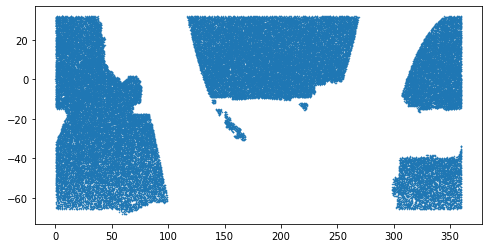

In [8]:
plt.scatter(file['parameters'][:,14],file['parameters'][:,15],marker='.',s=1)

Text(0.5, 1.0, 'R per wave of DESI SED')

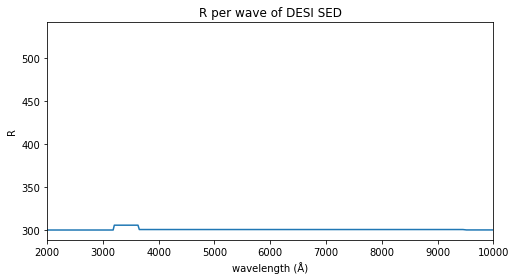

In [9]:
s = []
for i in range(len(file['best_fit']['wavelength_rest'][:]*1e4)-1):
    s.append(file['best_fit']['wavelength_rest'][:][i+1]*1e4 - file['best_fit']['wavelength_rest'][:][i]*1e4)
s.append(file['best_fit']['wavelength_rest'][:][i+1]*1e4 - file['best_fit']['wavelength_rest'][:][i]*1e4)

plt.plot(file['best_fit']['wavelength_rest'][:]*1e4 ,file['best_fit']['wavelength_rest'][:]*1e4 / (s))
plt.xlim(2000,10000)
plt.xlabel('wavelength (Å)')
plt.ylabel('R')
plt.title('R per wave of DESI SED')

In [28]:
print(file['best_fit']['z'][:])
print(file['ID'][:])
# ID = 0 is a wrong data

[2.62865105e-88 3.47900000e-01 2.36420000e-01 ... 6.83243000e-01
 5.00811000e-01 5.29518000e-01]
[b'0' b'66218190' b'55346252' ... b'100047215' b'117880476' b'50793217']


In [26]:
mask = (file['best_fit']['z'][:] > 0.0001) & (file['best_fit']['z'][:] < 10)

光谱grid为: 2079
红移: 0.741106


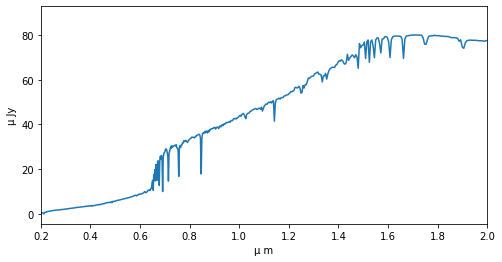

In [5]:
plt.plot(file['best_fit']['wavelength_rest'][:]*(1+file['best_fit']['z'][16424]),
         file['best_fit']['spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]'][16424])
plt.xlim(0.2,2)
plt.xlabel('μ m')
plt.ylabel('μ Jy')
print('光谱grid为:',len(file['best_fit']['spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]'][16424]))
print('红移:',file['best_fit']['z'][16424])